## Import necessary libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score

## Collect data and load them
##### First we need to collect the relevant data according to our problem.
##### It means that we need to collect relevant (independent) data for (dependent) features to make predictions.
##### We can visualize data as well.

In [4]:
data = pd.read_csv("emails.csv")

In [5]:
data.head()    # Print first 5 rows

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


##### Visualisation of if sample emails are spam or ham.

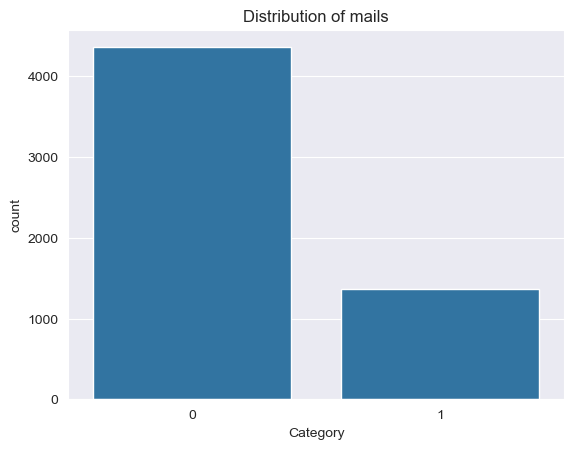

In [7]:
sns.countplot(data=data, x='spam')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

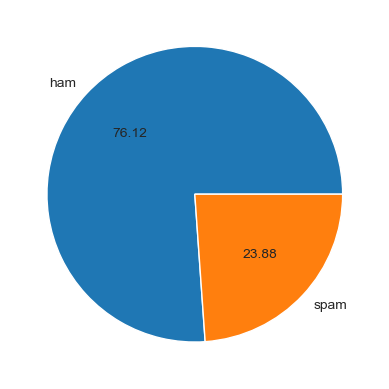

In [8]:
plt.pie(data['spam'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

## Data Preprocessing
##### We want handle missing data 
##### Convert categorical data into numerical or boolean
##### Drop duplicate data
##### Prepare the data set according to our problem
##### Divide data as features(independent) and target(dependent)

In [4]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


##### Check missing values

In [5]:
# Check the missing data and get the total sum of this data
data.isnull().sum()

text    0
spam    0
dtype: int64

##### Find duplicate datasets and drop them

In [12]:
print("Duplicate row count : ",data.duplicated().sum())

Duplicate row count :  33


In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

##### Separate target value and features

In [15]:
independent = data["text"]
dependent = data["spam"]

In [16]:
independent.head()

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
Name: text, dtype: object

In [17]:
dependent.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


## Split the Data into training and testing
##### training data for train model
##### testing data for test our model accuracy

In [18]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=42)

## Feature Extraction
##### Convert the preprocessed text into numerical features

In [19]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

In [20]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [21]:
print(x_train_features)

  (0, 30703)	0.4014836336292207
  (0, 25552)	0.12988009839298162
  (0, 32348)	0.36805897799019793
  (0, 27405)	0.2027266276127113
  (0, 32030)	0.2487666506269081
  (0, 24449)	0.25622760622305524
  (0, 3425)	0.36062558789029864
  (0, 25314)	0.21283968400983308
  (0, 25201)	0.2016951105281913
  (0, 17531)	0.13235959995238933
  (0, 10429)	0.18104981492432806
  (0, 8631)	0.49918257052218684
  (0, 29200)	0.048221584933839566
  (1, 20357)	0.22296204096952915
  (1, 18618)	0.1405657503723137
  (1, 20853)	0.22791703805902366
  (1, 20359)	0.24318963701670282
  (1, 14331)	0.19838780993139282
  (1, 12683)	0.14258332128599505
  (1, 23663)	0.3095508665548617
  (1, 19112)	0.3095508665548617
  (1, 29008)	0.240562278094169
  (1, 19860)	0.2147439502398577
  (1, 18598)	0.23367884137231507
  (1, 14783)	0.20334280702088733
  :	:
  (4555, 16021)	0.13457083215593485
  (4555, 15906)	0.14565064876443573
  (4555, 26885)	0.15960956684904778
  (4555, 32499)	0.10495780510374866
  (4555, 32960)	0.0872244273948734
 

## Handle class imbalance problem
##### Handling class imbalance is crucial because it can lead to biased models that perform poorly on the minority class.

In [22]:
smt = SMOTE(random_state=42)

In [23]:
y_train.value_counts()

spam
0    3484
1    1072
Name: count, dtype: int64

In [24]:
new_x_train,  new_y_train = smt.fit_resample(x_train_features, y_train)

In [25]:
new_y_train.value_counts()

spam
0    3484
1    3484
Name: count, dtype: int64

## Evaluate the Model

In [26]:
model = LogisticRegression()

In [27]:
model.fit(x_train_features, y_train)

LogisticRegression()

## Check model performance
### Get accuracy score for get model accuracy

In [28]:
prediction_train = model.predict(x_train_features)
accuracy_train = accuracy_score(y_train, prediction_train)
print("Accuracy on training data:", accuracy_train)

Accuracy on training data: 0.996268656716418


In [29]:
# prediction on test data

prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print("Accuracy on test data:", accuracy_on_test_data)

Accuracy on test data: 0.9771729587357331


### Sample mail check using trained model

In [47]:
input_mail = ["Are you looking for love? Join our dating site today and meet attractive singles in your area. Sign up now for a free trial and find your perfect match."]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if prediction[0]==1:
  print('spam mail')

else:
  print('not spam')

[1]
spam mail


### Get confusion matrix
##### The confusion matrix is a performance measurement tool for machine learning classification problems. It is especially useful in evaluating the performance of a binary classifier like logistic regression in email spam detection. The confusion matrix shows the counts of true positive, true negative, false positive, and false negative predictions made by the model.

In [32]:
y_predict = model.predict(x_test_features)

In [33]:
y_predict_probability = model.predict_proba(x_test_features)

In [34]:
y_predict_probability

array([[0.95236688, 0.04763312],
       [0.45325387, 0.54674613],
       [0.98547493, 0.01452507],
       ...,
       [0.98342473, 0.01657527],
       [0.2748284 , 0.7251716 ],
       [0.07202948, 0.92797052]])

In [43]:
confusion_matrix(y_test, y_predict)

array([[840,   3],
       [ 23, 273]], dtype=int64)

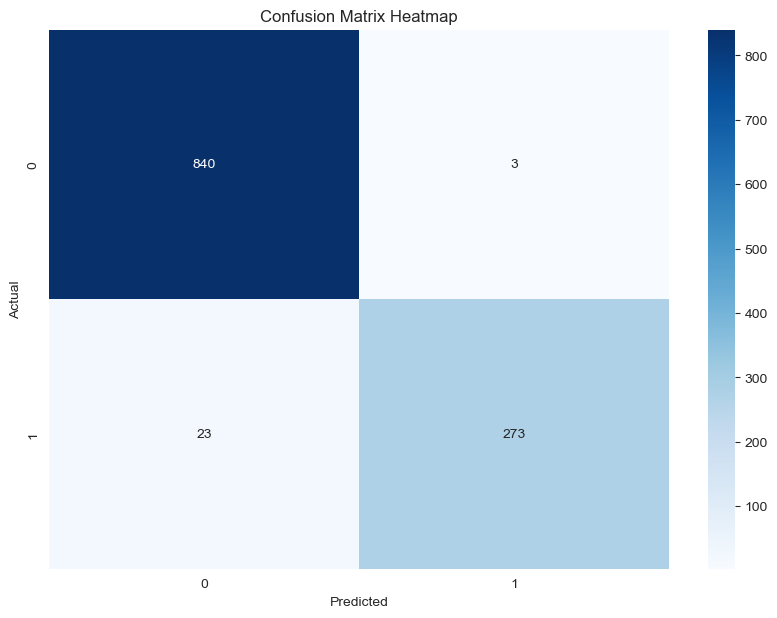

In [36]:
# Plot data using heat map
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [37]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       843
           1       0.99      0.92      0.95       296

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139



##### The classification report provides precision, recall, and F1 score for each class (0: non-spam, 1: spam).

### Receiver Operating Characteristics (ROC Curve)
##### The Receiver Operating Characteristics (ROC) curve is a graphical representation used to evaluate the performance of a binary classifier. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) of the ROC curve provides a single metric to summarize the overall performance of the classifier.

In [38]:
fpr, tpr , _ = roc_curve(y_test, y_predict_probability[:,1])

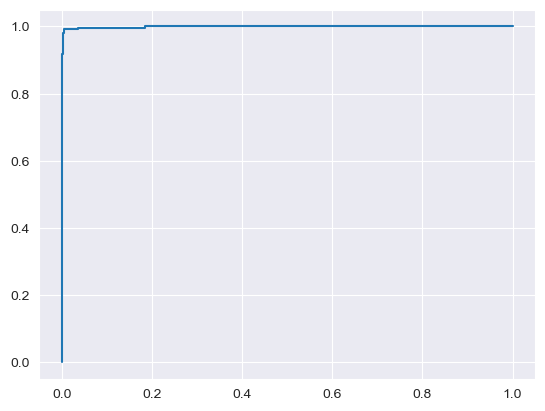

In [39]:
plt.plot(fpr, tpr)

In [45]:
score = roc_auc_score(y_test, y_predict_probability[:,1])

In [46]:
score

0.9987175787887531